In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-206f0b5d-cea7-069e-0d98-df946d823841)


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
%%capture
!pip install transformers

In [ ]:
import pandas as pd
# from sklearn.model_selection import train_test_split

# import torch
# from torch.utils.data import Dataset, DataLoader

In [ ]:
train_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/train_preprocessed.csv")
val_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/validation_preprocessed.csv")
test_data = pd.read_csv("drive/MyDrive/Internship/datasets/Goud/test_preprocessed.csv")

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
train_data

,headline,categories
0,حكم ضد وزاره اعماره بتعويض قدره 13 مليار لشركه,"('جورنالات بلادي',)"
1,جلسه خاصه بين مدرب الاهلي ومهاجم الاسود ازارو,"('كود سبور',)"
2,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش صور,"('كود سبور',)"
3,الاسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)"
4,الجديد ريحه ديال المازوط وليصونس لعشاق صوكان وطوموبيلات,"('تبركيك',)"
...,...,...
62005,واش دخلو الصهد امحند العنصر ل كود مزال مقررت نترشح للامانه العامه ديال الحركه الشعبيه وها وقتاش غادي نقرر,"('تبركيك',)"
62006,الفنانه المغربيه ابتسام تسكت مطلوبه بوجده,"('الزين والحداكة',)"
62007,من بعد 15 العام تصوير تتمه فيلم ماروك لي كان نوض روينه,"('ميديا وثقافة',)"
62008,جورنالات بلادي1 غموض يلف صرف 5 ملايير بمؤسسه الاعمال الاجتماعيه بوزاره الصحه وامن طنجه يعتقل زعيم عصابه بتهمه اختطاف زوجين واحتجازهما للمطالبه بفديه,"('جورنالات بلادي',)"


In [ ]:
val_data

,headline,categories
0,خنيفره الحبس و الخطيه لراپور متهم باهانه موظف,"('آش واقع',)"
1,مشات تقلد كارديشيان ممثله تصاب بفشل كلوي بسبب حزام نحت الخصر,"('تبركيك',)"
2,اشبيليه يطارد الدولي المغربي امرابط,"('كود سبور',)"
3,في عيد المراه تعلمي ماتخافيش من جمالك راه جسدك ما كيلغيش عقلك,"('آراء',)"
4,زوجه عسكري في الصحراء تنتحر شنقا في خينفره,"('آش واقع',)"
...,...,...
4132,سعد لمجرد كيحاول يمحي صوره المغتصب ويبين انسانيتو باستغلال العواطف والموت واستماله الجمهور,"('تبركيك',)"
4133,جورنالات بلادي 100 مسؤول رفضو التصريح بالممتلكات وجديد محاكمه شبكه تجنيس الاسرائيليين,"('جورنالات بلادي',)"
4134,الخلفي موقف رئيس الحكومه من تقاعد البرلمانيين لم يتغير وهناك مقترح قانون جماعي,"('آش واقع',)"
4135,ومن الحب ما قتل هندي انتاحر في لايف علي فيسبوك من بعدما سمحات فيه صاحبتو,"('تبركيك',)"


In [ ]:
test_data

,headline,categories
0,التخلف باقي فالمجتمع البخور وهياكل الموتي و بيض الغول في احتفالات عاشوراء,"('جورنالات بلادي',)"
1,ف زمان كورونا كونصير د الروك تدار ف برشلونه حضروه 5 الاف شخص مافيه لا تباعد لا والو و ها كيفاش فيديو,"('ميديا وثقافة',)"
2,كيم كارداشيان تعرات عاوتاني صور,"('تبركيك',)"
3,نقابتا الاتحاد والفيدراليه دخلو صحاح فوزاره انيس بيرو واتهامات بالزبونيه للمسؤولين,"('آش واقع',)"
4,اداريه الرباط لشركه صوماجيك فطنجه ممنوع من هنا لفوق ديرو الصابو لسيارات المواطنين,"('آش واقع',)"
...,...,...
4109,مزاد علني فيه رسائل مارسيل بروست فشل 16 رساله مداها فيها حد,"('ميديا وثقافة',)"
4110,سكوب صافي كلشي توقع صفقه القرن اللي دارها مولاي حفيظ العلمي مع شركه جنوب افريقيه بمليار دولار تمات رسميا اقاله بوسعيد ما عندها علاقه بهاد الصفقه,"('تبركيك',)"
4111,الكسال اللي شرمل هولنديه بفاس مولوع بمؤخرات النساء وها الطريقه باش كيجيب الشهوه ديالو,"('تبركيك',)"
4112,بنكيران يصارع لتقليص لائحه قيادي الحزب المعتذرين عن الترشح للانتخابات ومحاولات اخيره لاقناع باها,"('آش واقع',)"


In [ ]:
train_data["categories"].unique()

array(["('جورنالات بلادي',)", "('كود سبور',)", "('تبركيك',)", "('آراء',)",
       "('آش واقع',)", "('ميديا وثقافة',)", "('الزين والحداكة',)"],
      dtype=object)

In [ ]:
val_data["categories"].unique()

array(["('آش واقع',)", "('تبركيك',)", "('كود سبور',)", "('آراء',)",
       "('ميديا وثقافة',)", "('جورنالات بلادي',)", "('الزين والحداكة',)"],
      dtype=object)

In [ ]:
test_data["categories"].unique()

array(["('جورنالات بلادي',)", "('ميديا وثقافة',)", "('تبركيك',)",
       "('آش واقع',)", "('كود سبور',)", "('آراء',)",
       "('الزين والحداكة',)"], dtype=object)

In [ ]:
def categ2label(categ):
  labels_dict = {
      "('جورنالات بلادي',)" : 0,
      "('كود سبور',)" : 1,
      "('تبركيك',)" : 2,
      "('آراء',)" : 3,
      "('آش واقع',)" : 4,
      "('ميديا وثقافة',)" : 5,
      "('الزين والحداكة',)" : 6,
  }
  return labels_dict[categ]

In [ ]:
train_data["label"] = train_data["categories"].apply(categ2label)
val_data["label"] = val_data["categories"].apply(categ2label)
test_data["label"] = test_data["categories"].apply(categ2label)

In [ ]:
train_data

,headline,categories,label
0,حكم ضد وزارة اعمارة بتعويض قدره مليار لشركة,"('جورنالات بلادي',)",0
1,جلسة خاصة بين مدرب الأهلي ومهاجم الأسود أزارو,"('كود سبور',)",1
2,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش...,"('كود سبور',)",1
3,الأسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)",1
4,الجديد ريحة ديال المازوط وليصونس لعشاق صوكان ...,"('تبركيك',)",2
...,...,...,...
62005,واش دخلو الصهد امحند العنصر ل كود مزال مقرر...,"('تبركيك',)",2
62006,الفنانة المغربية ابتسام تسكت مطلوبة بوجدة‏,"('الزين والحداكة',)",6
62007,من بعد العام تصوير تتمة فيلم ماروك لي كان ...,"('ميديا وثقافة',)",5
62008,جورنالات بلادي غموض يلف صرف ملايير بمؤسسة ال...,"('جورنالات بلادي',)",0


In [ ]:
val_data

,headline,categories,label
0,خنيفرة الحبس و الخطية لراپور متهم بإهانة موظف,"('آش واقع',)",4
1,مشات تقلد كارديشيان ممثلة تصاب بفشل كلوي بسبب...,"('تبركيك',)",2
2,إشبيلية يطارد الدولي المغربي أمرابط,"('كود سبور',)",1
3,في عيد المرأة تعلمي ماتخافيش من جمالك راه جسد...,"('آراء',)",3
4,زوجة عسكري في الصحراء تنتحر شنقا في خينفرة,"('آش واقع',)",4
...,...,...,...
4132,سعد لمجرد كيحاول يمحي صورة المغتصب ويبين انسان...,"('تبركيك',)",2
4133,جورنالات بلادي مسؤول رفضو التصريح بالممتلكات ...,"('جورنالات بلادي',)",0
4134,الخلفي موقف رئيس الحكومة من تقاعد البرلمانيين...,"('آش واقع',)",4
4135,ومن الحب ما قتل هندي انتاحر في لايف على فيسب...,"('تبركيك',)",2


In [ ]:
test_data

,headline,categories,label
0,التخلف باقي فالمجتمع البخور وهياكل الموتى و ب...,"('جورنالات بلادي',)",0
1,ف زمان كورونا كونصير د الروك تدار ف برشلونة ح...,"('ميديا وثقافة',)",5
2,كيم كارداشيان تعرات عاوتاني صور,"('تبركيك',)",2
3,نقابتا الاتحاد والفيدرالية دخلو صحاح فوزارة أن...,"('آش واقع',)",4
4,ادارية الرباط لشركة صوماجيك فطنجة ممنوع من هن...,"('آش واقع',)",4
...,...,...,...
4109,مزاد علني فيه رسائل مارسيل بروست فشل رسالة مد...,"('ميديا وثقافة',)",5
4110,سكوب صافي كلشي توقع صفقة القرن اللي دارها مو...,"('تبركيك',)",2
4111,الكسال اللي شرمل هولندية بفاس مولوع بمؤخرات ال...,"('تبركيك',)",2
4112,بنكيران يصارع لتقليص لائحة قيادي الحزب المعتذر...,"('آش واقع',)",4


In [ ]:
# train_headlines, temp_headlines, train_labels, temp_labels = train_test_split(train_data['headline'], train_data['label'], random_state=42, 
#                                                                     test_size=0.2)

# val_headlines, test_headlines, val_labels, test_labels = train_test_split(temp_headlines, temp_labels, random_state=42, 
#                                                                 test_size=0.5)

In [ ]:
train_headlines = train_data["headline"]
train_labels = train_data["label"]
val_headlines = val_data["headline"]
val_labels = val_data["label"]
test_headlines = test_data["headline"]
test_labels = test_data["label"]

In [ ]:
%%capture
from transformers import BertTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
tokenizer = BertTokenizer.from_pretrained("alger-ia/dziribert")

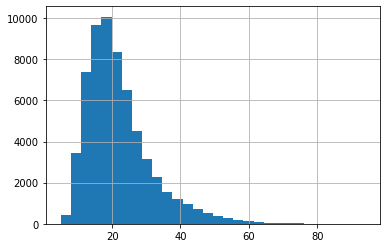

In [ ]:
seq_len = [len(tokenizer.encode(i)) for i in train_headlines]

pd.Series(seq_len).hist(bins = 30)

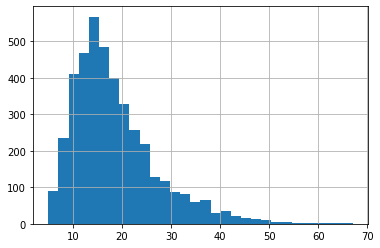

In [ ]:
seq_len = [len(tokenizer.encode(i)) for i in val_headlines]

pd.Series(seq_len).hist(bins = 30)

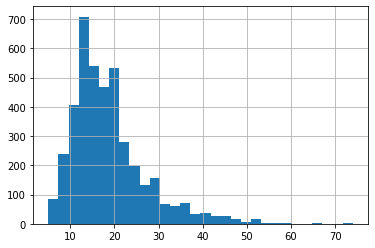

In [ ]:
seq_len = [len(tokenizer.encode(i)) for i in test_headlines]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40

train_encodings = tokenizer(train_headlines.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_headlines.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_headlines.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class ArticleDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ArticleDataset(train_encodings, train_labels)
val_dataset = ArticleDataset(val_encodings, val_labels)
test_dataset = ArticleDataset(test_encodings, test_labels)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
%%capture
model = AutoModelForSequenceClassification.from_pretrained("alger-ia/dziribert", num_labels=7)

In [ ]:
training_args = TrainingArguments(
    output_dir='drive/MyDrive/Internship/code/results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    evaluation_strategy='epoch',     # evaluate at the end of each epoch
    logging_strategy='epoch',        # log at the end of each epoch
    save_strategy='epoch', 
    overwrite_output_dir=True,
    save_total_limit=3,
    seed=42,
    data_seed=42
    )

trainer = Trainer(
    model=model,                         # the instantiated Transformers model 
    args=training_args,                  # training arguments
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics      # method we defined before to compute our metrics
    )

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.915200,0.787840,0.713319,0.716403,0.734521,0.713319
2,0.508600,0.742898,0.752961,0.753576,0.759130,0.752961
3,0.253800,0.950395,0.742325,0.742393,0.746392,0.742325
4,0.115700,1.304990,0.743051,0.744536,0.750071,0.743051
5,0.053600,1.592001,0.741842,0.742857,0.744617,0.741842


TrainOutput(global_step=9690, training_loss=0.3693789927952061, metrics={'train_runtime': 2396.7184, 'train_samples_per_second': 129.364, 'train_steps_per_second': 4.043, 'total_flos': 6373534763700000.0, 'train_loss': 0.3693789927952061, 'epoch': 5.0})

In [ ]:
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[-1.7511408 , -2.4505832 ,  3.4821837 , ..., -3.2551453 ,
        -2.0647352 ,  1.7855119 ],
       [-1.0815303 ,  8.870548  , -0.07889107, ..., -2.149632  ,
        -1.1173731 , -1.1959081 ],
       [-1.9170223 , -2.0835552 ,  3.3546128 , ..., -2.3674176 ,
        -2.577556  ,  7.200263  ],
       ...,
       [-0.8427382 , -2.4663656 ,  8.561737  , ..., -1.1256523 ,
        -2.1695511 , -0.5709449 ],
       [-1.1644509 , -3.050019  ,  0.8338021 , ...,  8.276635  ,
        -1.5010003 , -2.699832  ],
       [ 6.806804  , -1.8117362 , -2.690828  , ...,  3.5064845 ,
        -1.4561876 , -2.8914368 ]], dtype=float32), label_ids=array([0, 5, 2, ..., 2, 4, 4]), metrics={'test_loss': 1.606921672821045, 'test_accuracy': 0.7372386971317453, 'test_f1': 0.7373940795340236, 'test_precision': 0.7381104893716302, 'test_recall': 0.7372386971317453, 'test_runtime': 8.5361, 'test_samples_per_second': 481.952, 'test_steps_per_second': 7.615})